# EEP 153: Project 4
## Team Normal Borlaug: A Study of Uganda VS Tanzania

This Python notebook walks through all of our deliverables, so you can run it and check out how everything works in addition to verify we have met all of our deliverables. ***Click*** on the Table of Contents to be directed to any deliverable you want to see.

However, before you run *anything* please run these installs so that everything works properly!

In [1]:
# Run these installs!
!pip install CFEDemands>=0.4.1
!pip install gspread>=5.0.1
!pip install gspread_pandas>=3.2.0
!pip install oauth2client>=4.1.3
!pip install plotly>=5.5.0
!pip install python-gnupg
!pip install ConsumerDemands
import cfe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

  Using cached python_gnupg-0.5.2-py2.py3-none-any.whl (20 kB)


## Table of Contents and Deliverables
1. <a href="#replicability-and-documentation"><span style="color:red;">[Deliverable 1.1[A]]</span> - Replicability and Documentation</a>
2. <a href="#document-goals"><span style="color:red;">[Deliverable 1.2[A]]</span> - Document Goals</a>
3. <a href="#unit-tests"><span style="color:red;">[Deliverable 1.3[A]]</span> - Unit Tests</a>
4. <a href="#choice-of-a-dataset"><span style="color:red;">[Deliverable 1.4[A]]</span> - Choice of a Dataset</a>
5. <a href="#estimate-demand-system"><span style="color:red;">[Deliverable 1.5[A]]</span> - Estimate Demand System</a>
6. <a href="#construct-nutrient-system"><span style="color:red;">[Deliverable 1.6[A]]</span> - Construct Nutrient System</a>
7. <a href="#nutritional-challenges-and-policy-goal"><span style="color:red;">[Deliverable 1.7[A]]</span> - Nutritional Challenges and Policy Goal</a>
8. <a href="#policy-options"><span style="color:red;">[Deliverable 1.8[B]]</span> - Policy Options</a>
9. <a href="#policy-cost"><span style="color:red;">[Deliverable 1.9[C]]</span> - Policy Cost</a>
10. <a href="#value-of-technical-innovation"><span style="color:red;">[Deliverable 1.10[C]]</span> - Value of Technical Innovation</a>
11. <a href="#replication-and-discussion"><span style="color:red;">[Deliverable 1.12[A]]</span> - Replication and Discussion</a>
12. <a href="#works-cited"><span style="color:red;"></span> Works Cited</a>

## [Deliverable 1.1[A] - Replicability and Documentation](#replicability-and-documentation)

## [Deliverable 1.2[A] - Document Goals](#document-goals)

## [Deliverable 1.3[A] - Unit Tests](#unit-tests)

## [Deliverable 1.4[A] - Choice of a Dataset](#choice-of-a-dataset)

For this project, we will focus on neighboring Eastern African countries, Tanzania and Uganda. As such, we will use the following datasets, from `csv`, originating from the LSMS data catalog from the [World Bank Dataset](https://microdata.worldbank.org/index.php/catalog/lsms/?page=1&ps=15&repo=lsms).

Datasets used include:
- `tanzania_expenditures_2019-2020.csv`
- `uganda_expenditures_2019-2020.csv`
- `tanzania_fct.csv`
- `uganda_fct.csv`
- `tanzania_food_prices_2019-2020.csv`
- `uganda_food_prices_2019-2020.csv`
- `tanzania_HH_characteristics.csv`
- `uganda_HH_characteristics.csv`
- `uganda_rdi.csv`

Run these lines of code to display each of them!

In [2]:
# Expenditure Data for Tanzania

tanzania_expenditure_df = pd.read_csv("data/tanzania/tanzania_expenditures_2019-2020.csv")
tanzania_expenditure_df.head(5)

,i,t,m,Cassava Fresh,Chicken,Cooking Oil,Leafy Greens,Millet & Sorghum (flour),Salt,Sugar,...,Cassava Dry/Flour,Yams/Cocoyams,"Butter, Etc.",Milk (dry or canned),Sweets,Seeds,Eggs,Nuts,Other Meat,Rice (paddy)
0,0001-001-001,2019-20,Mainland Rural,1500.00,10400.0,875.0,1757.142857,10500.000000,200.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001-001-003,2019-20,Mainland Rural,1156.25,NaN,875.0,1415.476190,6000.000000,200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001-001-004,2019-20,Dar Es Salaam,NaN,NaN,1800.0,NaN,NaN,200.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001-004-001,2019-20,Mainland Rural,NaN,NaN,1050.0,410.000000,7500.000000,250.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0001-004-002,2019-20,Mainland Other Urban,NaN,NaN,1050.0,656.250000,7428.571429,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Nutritional Information of Foods for Tanzania

tanzania_fct_df = pd.read_csv("data/tanzania/tanzania_fct.csv")
tanzania_fct_df.head(5)

,j,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
0,Cassava Fresh,1600,14.00,20.0,270,160,381.00,3.00,8.540,0.48,0.870,10,0.0,0.880,206.0,3.00
1,Chicken,2390,273.00,0.0,50,150,0.00,13.00,84.870,1.68,0.630,480,3.0,4.000,0.0,19.00
2,Cooking Oil,8840,0.00,0.0,0,0,0.00,0.00,0.000,0.00,0.000,0,0.0,0.000,0.0,0.00
3,Leafy Greens,22,1.09,0.0,0,40,4.07,0.32,0.375,0.00,0.082,0,0.0,0.071,15.2,0.31
4,Millet & Sorghum (flour),3740,109.00,90.0,840,80,721.00,30.00,46.680,2.87,4.160,0,0.0,3.800,0.0,17.00


In [4]:
# Tanzania Price Data

tanzania_p_df = pd.read_csv("data/tanzania/tanzania_food_prices_2019-2020.csv")
tanzania_p_df.head(5)

,Unnamed: 0,Unnamed: 1,2019-20,2019-20.1,2019-20.2,2019-20.3
0,j,u,Dar Es Salaam,Mainland Other Urban,Mainland Rural,Zanzibar
1,Beef,kg,6000,6000,6000,9000
2,Bottled Beer,kg,4285.714286,4000,4000,NaN
3,Bottled Beer,piece,NaN,NaN,NaN,NaN
4,Bread,kg,2211.111111,2222.222222,2000,2000


In [5]:
# Tanzania Household Characteristics

tanzania_hh_char_df = pd.read_csv("data/tanzania/tanzania_HH_characteristics.csv")
tanzania_hh_char_df.head(5)

,i,t,m,M 00-03,F 00-03,M 04-08,F 04-08,M 09-13,F 09-13,M 14-18,F 14-18,M 19-30,F 19-30,M 31-50,F 31-50,M 51+,F 51+,log HSize
0,0001-001-001,2019-20,Mainland Rural,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.693147
1,0001-001-003,2019-20,Mainland Rural,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000
2,0001-001-004,2019-20,Dar Es Salaam,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000
3,0001-004-001,2019-20,Mainland Rural,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1.098612
4,0001-004-002,2019-20,Mainland Other Urban,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000


In [6]:
# Expenditure Data for Uganda

uganda_expenditure_df = pd.read_csv("data/uganda/uganda_expenditures_2019-2020.csv")
uganda_expenditure_df.head(5)

,i,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,3600.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4000.0,200.0,1000.0,NaN,NaN,NaN,3000.0,NaN
1,062da72d5d3a457e9336b62c8bb9096d,2019-20,Eastern,NaN,NaN,NaN,NaN,NaN,500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,1000.0,4500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,800.0,NaN,NaN,NaN,NaN,NaN
3,0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,2800.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5000.0,200.0,500.0,NaN,NaN,NaN,NaN,NaN
4,1013000201,2019-20,Central,NaN,NaN,17500.0,NaN,NaN,NaN,NaN,...,NaN,2000.0,NaN,400.0,2100.0,NaN,NaN,NaN,NaN,NaN


In [7]:
# Food Nutrition Data for Uganda

uganda_fct_df = pd.read_csv("data/uganda/uganda_fct.csv")
uganda_fct_df.head(5)

,j,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
0,Avocado,1600,20.0,70.0,810,120,85.0,6.0,17.38,1.30,0.67,70,0.0,2.57,100,6.0
1,Beans (dry),1700,98.0,60.0,500,580,325.0,30.0,7.00,1.20,3.40,0,0.0,2.15,10,8.0
2,Beans (fresh),3470,214.0,160.0,5250,1130,626.0,51.0,11.74,2.12,7.13,0,0.0,4.74,63,23.0
3,Beef,2510,182.0,0.0,60,70,0.0,19.0,31.50,1.60,0.90,0,28.9,3.80,0,37.0
4,Beef (roasted),2910,264.0,0.0,70,90,0.0,27.0,37.20,2.20,0.90,0,24.7,3.40,0,60.0


In [8]:
# Uganda Food Prices Data

uganda_p_df = pd.read_csv("data/uganda/uganda_food_prices_2019-2020.csv")
uganda_p_df.head(5)

,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",Cabbages,...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,2005-06,Central,650.000000,2500,3000.0,NaN,NaN,1400.0,3000.0,1400.0,...,NaN,54.054054,750.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
1,2005-6,Eastern,550.000000,2400,2000.0,NaN,NaN,1000.0,3300.0,1050.0,...,NaN,40.000000,200.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
2,2005-6,Northern,434.151414,2500,2400.0,NaN,NaN,1000.0,1500.0,1225.0,...,NaN,43.243243,200.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
3,2005-6,Western,500.000000,2200,2500.0,NaN,NaN,1000.0,3000.0,1050.0,...,NaN,41.621622,200.0,1000.0,200.0,NaN,NaN,NaN,NaN,NaN
4,2009-10,Central,1350.000000,5000,4000.0,NaN,NaN,2400.0,4800.0,1750.0,...,NaN,108.108108,1000.0,800.0,300.0,NaN,NaN,NaN,NaN,NaN


In [9]:
# Uganda Household Characteristics

uganda_hh_char_df = pd.read_csv("data/uganda/uganda_HH_characteristics.csv")
uganda_p_df.head(5)

,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",Cabbages,...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,2005-06,Central,650.000000,2500,3000.0,NaN,NaN,1400.0,3000.0,1400.0,...,NaN,54.054054,750.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
1,2005-6,Eastern,550.000000,2400,2000.0,NaN,NaN,1000.0,3300.0,1050.0,...,NaN,40.000000,200.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
2,2005-6,Northern,434.151414,2500,2400.0,NaN,NaN,1000.0,1500.0,1225.0,...,NaN,43.243243,200.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
3,2005-6,Western,500.000000,2200,2500.0,NaN,NaN,1000.0,3000.0,1050.0,...,NaN,41.621622,200.0,1000.0,200.0,NaN,NaN,NaN,NaN,NaN
4,2009-10,Central,1350.000000,5000,4000.0,NaN,NaN,2400.0,4800.0,1750.0,...,NaN,108.108108,1000.0,800.0,300.0,NaN,NaN,NaN,NaN,NaN


In [10]:
# Uganda's RDIs, but we use as a comparison point for both Uganda and Tanzania.

rdi_df = pd.read_csv("data/uganda/uganda_rdi.csv")
rdi_df.head(5)

,n,F 00-03,M 00-03,F 04-08,M 04-08,F 09-13,M 09-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
0,Energy,1000.0,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
1,Protein,13.0,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
2,Fiber,14.0,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
3,Folate,150.0,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
4,Calcium,700.0,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0


## [Deliverable 1.5[A] - Estimate Demand System](#estimate-demand-system)

In [11]:
# Reading in pickled data

result_uganda = cfe.regression.read_pickle("uganda.pickle")
result_tanzania = cfe.regression.read_pickle("tanzania.pickle")

## [Deliverable 1.6[A] - Construct Nutrient System](#construct-nutrient-system)

In [12]:
# Reading the expenditures dataset for Uganda
x_uganda = pd.read_csv("data/uganda/uganda_expenditures_2019-2020.csv")

# If the 'm' column is not present, add it and set its values to 1
if 'm' not in x_uganda.columns:
    x_uganda['m'] = 1

# Setting a multi-level index
x_uganda = x_uganda.set_index(['i', 't', 'm'])
x_uganda.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
x_uganda = x_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
x_uganda = x_uganda.replace(0, np.nan)

# Reading the household characteristics dataset for Uganda
z_uganda = pd.read_csv("data/uganda/uganda_HH_characteristics.csv")

# If the 'm' column is not present, add it
if 'm' not in z_uganda.columns:
    z_uganda['m'] = 1

# Setting a multi-level index
z_uganda = z_uganda.set_index(['i', 't', 'm'])
z_uganda.columns.name = 'k'

# Converting all columns to numeric, coercing errors to NaN
z_uganda = z_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Reading the prices dataset for Uganda
p_uganda = pd.read_csv("data/uganda/uganda_food_prices_2019-2020.csv")

# If the 'm' column is not present, add it
if 'm' not in p_uganda.columns:
    p_uganda['m'] = 1

# Setting a multi-level index
p_uganda = p_uganda.set_index(['t', 'm'])
p_uganda.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
p_uganda = p_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
p_uganda = p_uganda.replace(0, np.nan)

# Reading the Food Consumption Table (FCT) for Uganda
fct_uganda = pd.read_csv("data/uganda/uganda_fct.csv")

# Setting 'j' as the index
fct_uganda = fct_uganda.set_index('j')
fct_uganda.columns.name = 'n'

# Converting all columns to numeric, coercing errors to NaN
fct_uganda = fct_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Reading the Recommended Dietary Intakes (RDI) for Uganda
rdi_uganda = pd.read_csv("data/uganda/uganda_rdi.csv")

# Setting 'n' as the index
rdi_uganda = rdi_uganda.set_index('n')
rdi_uganda.columns.name = 'k'

# Running the CFE (Cost of Basic Needs) regression
result_uganda = cfe.Regression(y=np.log(x_uganda.stack()), d=z_uganda)

# Displaying the sorted beta values for Uganda
print("For Uganda:")
result_uganda.get_beta().sort_values(ascending=False)

For Uganda:


j
Fish (fresh)      0.886778
Milk (fresh)      0.834115
Biscuits          0.781522
Oranges           0.756571
Sorghum           0.686320
Bread             0.677132
Other Fruits      0.658992
Chapati           0.634176
Sweet Bananas     0.591652
Soda              0.586076
Other Veg.        0.585797
Sim Sim           0.563487
Rice              0.531964
Tomatoes          0.488395
Goat              0.467223
Mangos            0.463788
Fish (dried)      0.446381
Matoke            0.443616
Ground Nuts       0.426204
Beef              0.423841
Pork              0.422006
Tea               0.421568
Cooking Oil       0.416759
Maize             0.406007
Cabbages          0.403810
Waragi            0.401824
Dodo              0.369812
Millet            0.360086
Eggs              0.345383
Onions            0.340940
Sweet Potatoes    0.325598
Beans             0.316913
Peas              0.277380
Salt              0.145142
Cassava           0.142661
Name: beta, dtype: float64

In [13]:
# Reading the food expenditures dataset for Tanzania
x_tanzania = pd.read_csv("data/tanzania/tanzania_expenditures_2019-2020.csv")

# If the 'm' column is not present, add it and set its values to 1
if 'm' not in x_tanzania.columns:
    x_tanzania['m'] = 1

# Setting a multi-level index
x_tanzania = x_tanzania.set_index(['i', 't', 'm'])
x_tanzania.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
x_tanzania = x_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
x_tanzania = x_tanzania.replace(0, np.nan)

# Reading the household characteristics dataset for Tanzania
z_tanzania = pd.read_csv("data/tanzania/tanzania_HH_characteristics.csv")

# If the 'm' column is not present, add it
if 'm' not in z_tanzania.columns:
    z_tanzania['m'] = 1

# Setting a multi-level index
z_tanzania = z_tanzania.set_index(['i', 't', 'm'])
z_tanzania.columns.name = 'k'

# Converting all columns to numeric, coercing errors to NaN
z_tanzania = z_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Assuming the 'new.csv' file is related to Tanzania's price data. The original naming wasn't clear.
p_tanzania = pd.read_csv("data/new.csv")

# If the 'm' column is not present, add it
if 'm' not in p_tanzania.columns:
    p_tanzania['m'] = 1

# Setting a multi-level index
p_tanzania = p_tanzania.set_index(['t', 'm'])
p_tanzania.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
p_tanzania = p_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
p_tanzania = p_tanzania.replace(0, np.nan)

# Reading the Food Consumption Table (FCT) for Tanzania
fct_tanzania = pd.read_csv("data/tanzania/tanzania_fct.csv")

# Setting 'j' as the index
fct_tanzania = fct_tanzania.set_index('j')
fct_tanzania.columns.name = 'n'

# Converting all columns to numeric, coercing errors to NaN
fct_tanzania = fct_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# We use the same RDI for comparisons.
rdi_tanzania = pd.read_csv("data/uganda/uganda_rdi.csv")

# Setting 'n' as the index
rdi_tanzania = rdi_tanzania.set_index('n')
rdi_tanzania.columns.name = 'k'

# Running the CFE (Cost of Basic Needs) regression for Tanzania
result_tanzania = cfe.Regression(y=np.log(x_tanzania.stack()), d=z_tanzania)

# Displaying the sorted beta values for Tanzania
print("For Tanzania:")
result_tanzania.get_beta().sort_values(ascending=False)

For Tanzania:


j
Citrus Fruits               1.130966
Ripe Bananas                0.977499
Leafy Greens                0.671702
Plantains                   0.573747
Irish Potatoes              0.569504
Sweet Potatoes              0.560885
Vegetables (fresh)          0.515630
Soft drinks                 0.477239
Buns, Cakes And Biscuits    0.444066
Coconuts                    0.423381
Fish (fresh)                0.417848
Milk (fresh)                0.412032
Cassava Fresh               0.395648
Sugar                       0.394992
Cooking Oil                 0.391770
Macaroni, Spaghetti         0.390850
Wheat Flour                 0.390105
Pulses                      0.378353
Beef                        0.377320
Tea (dry)                   0.374065
Rice (husked)               0.310996
Bread                       0.300077
Chicken                     0.245496
Salt                        0.205973
Fish (dried)                0.188521
Maize (flour)               0.184789
Name: beta, dtype: float64

In [14]:
result = cfe.read_pickle('uganda.pickle') 
xhat = result.predicted_expenditures()

qhat = (xhat.unstack('j')/p_uganda).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_uganda.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_uganda.loc[use,:]
nutrients.mean() 

z = z_uganda[rdi_uganda.columns.tolist()]

hh_rdi = z@rdi_uganda.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

aligned_nutrients, aligned_hh_rwi = nutrients[use_nutrients].align(hh_rwi[use_nutrients], axis=0)
nutrient_ratio_uganda = (aligned_nutrients / aligned_hh_rwi).dropna()

nutrient_ratio_uganda

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
i,t,m,,,,,,,,,,,,,,,
00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,0.594696,0.601470,0.576679,0.748223,0.354329,1.015917,0.612028,0.587476,0.760336,0.833528,0.447994,0.452247,1.027569,2.119769,0.548618
062da72d5d3a457e9336b62c8bb9096d,2019-20,Eastern,1.076304,1.076749,0.934819,1.367311,0.903873,2.118351,2.162508,1.057012,1.291646,1.512890,0.738750,1.187948,2.103128,2.833571,0.951062
0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,0.813929,0.952066,0.730282,1.029095,0.550289,1.166448,0.884236,0.838939,1.019150,1.194446,0.593295,0.807467,1.610328,2.820293,0.835719
0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,0.611902,0.724563,0.551444,0.773674,0.359346,0.907548,0.679910,0.628318,0.768089,0.906815,0.453578,0.613550,1.209227,2.114872,0.594241
1013000201,2019-20,Central,5.884109,4.847370,4.588274,3.995576,2.249185,9.210316,7.543653,4.520951,5.186333,6.684015,2.924262,4.244852,7.178581,10.330624,4.439647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bfdf0d66403440ceab439b1e1c47cdea,2019-20,Eastern,0.570779,0.657207,0.566880,0.805990,0.343197,0.859735,0.652786,0.581576,0.744513,0.815485,0.418289,0.523237,1.119346,2.514645,0.531280
c33f6cb57d9849949e08a7350dabb829,2019-20,Central,3.032978,2.594608,2.358527,2.124230,1.152179,4.431044,3.894947,2.314428,2.784913,3.371851,1.579753,2.481759,3.681853,5.162368,2.396799
d10a687889de469687377204195f3db0,2019-20,Western,0.699029,0.750929,0.688624,0.768997,0.304688,1.500933,1.057215,0.739356,0.837084,1.033455,0.424804,0.775846,1.272341,1.581130,0.602965


In [15]:
result = cfe.read_pickle('tanzania.pickle') 
xhat = result.predicted_expenditures()

qhat = (xhat.unstack('j')/p_tanzania).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_tanzania.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_tanzania.loc[use,:]
nutrients.mean() 

z = z_tanzania[rdi_tanzania.columns.tolist()]

hh_rdi = z@rdi_tanzania.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_tanzania = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

nutrient_ratio_tanzania

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
i,t,m,,,,,,,,,,,,,,,
0001-001-004,2019-20,Dar Es Salaam,2.612128,2.967917,1.487057,1.685255,1.003479,8.112252,3.504556,2.667874,2.116337,2.692244,0.786657,3.227225,3.831207,1.828839,1.783025
0034-001-001,2019-20,Dar Es Salaam,1.192043,1.308199,0.649610,0.649648,0.296197,3.122856,1.011541,1.036847,0.871556,1.085621,0.374837,1.069940,1.378241,0.525715,0.760274
0042-001-001,2019-20,Dar Es Salaam,1.107394,1.365626,0.559382,0.530778,0.260461,2.667862,0.664292,0.995099,0.730325,0.891166,0.263934,1.122908,1.315708,0.576633,0.818864
0051-001-002,2019-20,Dar Es Salaam,1.353415,1.458640,0.667812,0.753157,0.435325,4.071950,1.588951,1.235620,0.957714,1.219293,0.292490,1.574321,1.655294,0.649069,0.859043
0051-001-003,2019-20,Dar Es Salaam,1.938710,2.234089,1.105489,0.951678,0.528719,4.749082,1.044719,1.711793,1.421636,1.593160,0.683706,2.021591,2.686202,1.463237,1.406101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0686-001-001,2019-20,Dar Es Salaam,2.080288,2.495543,1.030057,0.901828,0.447684,4.201362,1.114236,1.695771,1.320523,1.516319,0.549460,2.147907,2.485001,1.169691,1.561145
0701-003-001,2019-20,Dar Es Salaam,1.631082,1.978008,0.812825,0.782264,0.360527,3.392980,0.907858,1.417692,1.110805,1.317224,0.446936,1.640401,1.949301,0.838020,1.149575
0809-001-008,2019-20,Dar Es Salaam,2.391341,2.666470,1.376775,1.282068,0.768619,6.877336,1.644441,2.251619,1.824064,2.144881,0.781387,2.624121,3.379990,1.781704,1.678522


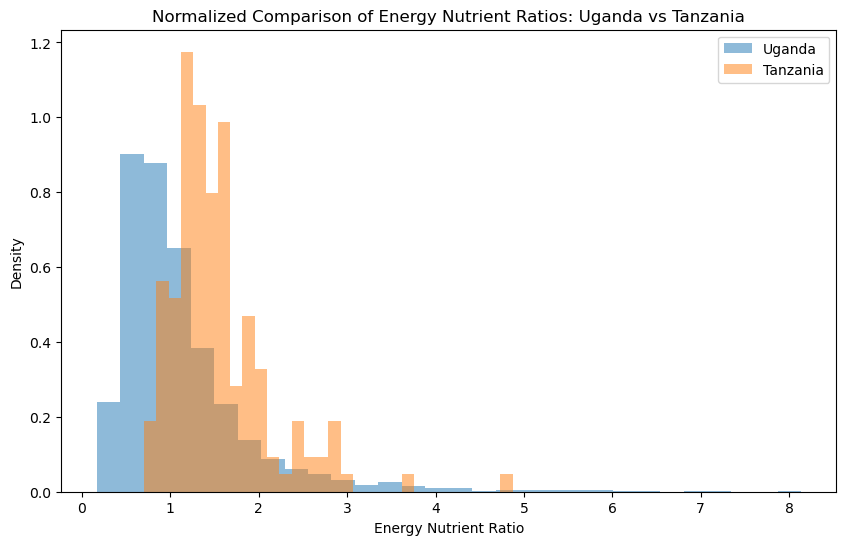

In [16]:
plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Energy'], bins=30, alpha=0.5, label='Uganda', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Energy'], bins=30, alpha=0.5, label='Tanzania', density=True)

plt.title('Normalized Comparison of Energy Nutrient Ratios: Uganda vs Tanzania')
plt.xlabel('Energy Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

## [Deliverable 1.7[A] - Nutritional Challenges and Policy Goal](#nutritional-challenges-and-policy-goal)

## The Specific Micronutrients of Focus: Vitamin A, Vitamin C, Vitamins B-9, and B-1

Both Tanzania and Uganda face a variety of nutritional challenges. More specifically, issues with lacking micronutrients is common in both of these countries. Micronutrients refers to vitamins and minerals, which are essential for the function of the body, fighting disease, and overall healthy development of the body. 

## Vitamin C in Tanzania and Uganda

 Significant micronutrient for growing and repairing tissue all around the body. It creates and supports production of collagen, protein, cartilage, and blood vessels, as well as assists repairing wounds and bones.

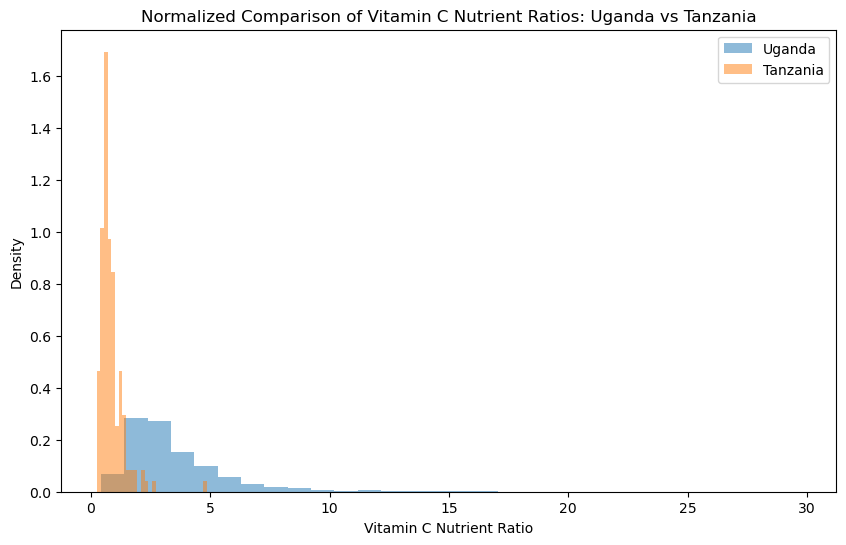

In [17]:
plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Vitamin C'], bins=30, alpha=0.5, label='Uganda', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Vitamin C'], bins=30, alpha=0.5, label='Tanzania', density=True)

plt.title('Normalized Comparison of Vitamin C Nutrient Ratios: Uganda vs Tanzania')
plt.xlabel('Vitamin C Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

# Vitamin A in Tanzania and Uganda
 Vitamin A is supports vision, the immune system, reproduction, and growth and development. It also helps your heart, lungs, and other organs function.

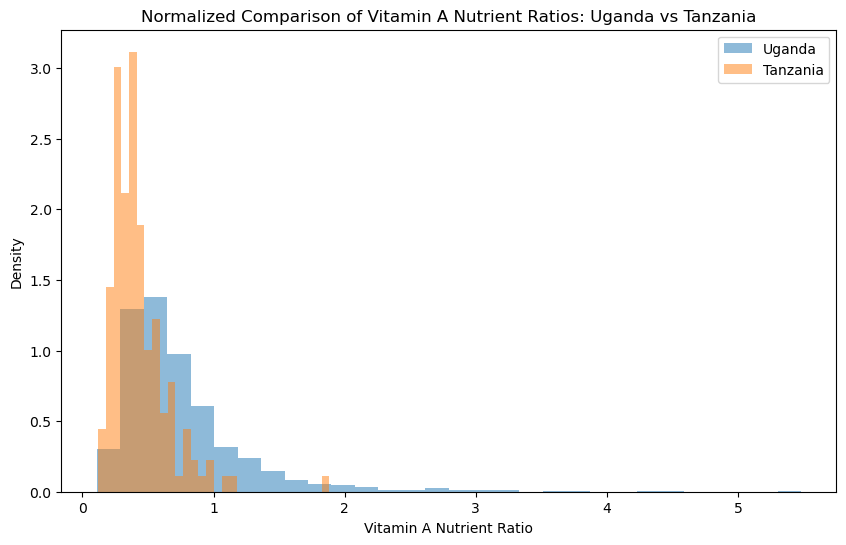

In [18]:
plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Vitamin A'], bins=30, alpha=0.5, label='Uganda', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Vitamin A'], bins=30, alpha=0.5, label='Tanzania', density=True)

plt.title('Normalized Comparison of Vitamin A Nutrient Ratios: Uganda vs Tanzania')
plt.xlabel('Vitamin A Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

# Vitamin B-9 (Folate) in Tanzania and Uganda

Folate (vitamin B-9) is important in red blood cell formation and for healthy cell growth and function. The nutrient is crucial during early pregnancy to reduce the risk of birth defects of the brain and spine. Folate is found mainly in dark green leafy vegetables, beans, peas and nuts.

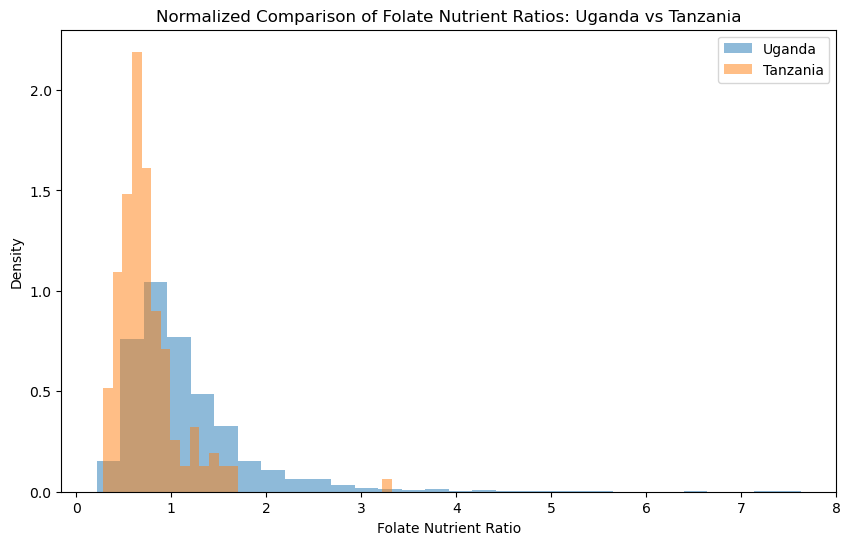

In [19]:
plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Folate'], bins=30, alpha=0.5, label='Uganda', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Folate'], bins=30, alpha=0.5, label='Tanzania', density=True)

plt.title('Normalized Comparison of Folate Nutrient Ratios: Uganda vs Tanzania')
plt.xlabel('Folate Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

# Vitamin B-1 (Thiamine) in Tanzania and Uganda

Thiamine supports the body in turning food into energy and to keep the nervous system functioning. Your body is not able to make thiamine for itself, so it must be sourced from foods. 

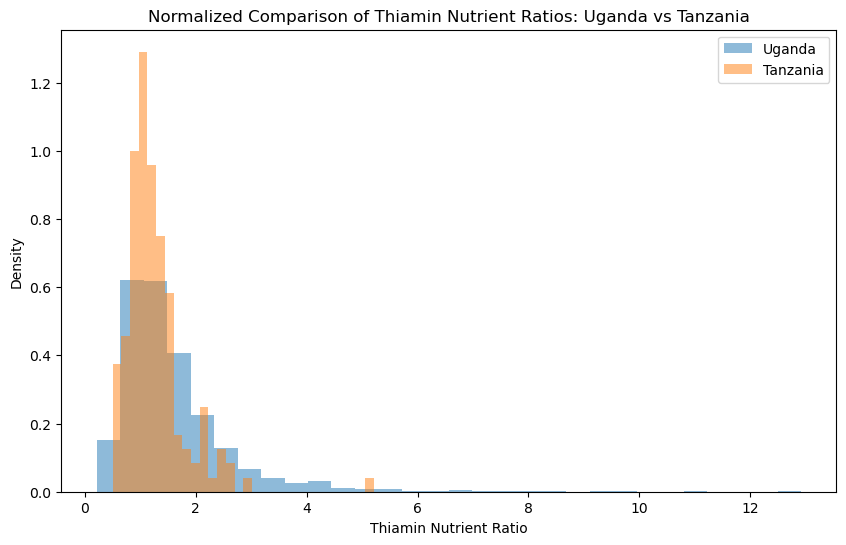

In [20]:
plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Thiamin'], bins=30, alpha=0.5, label='Uganda', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Thiamin'], bins=30, alpha=0.5, label='Tanzania', density=True)

plt.title('Normalized Comparison of Thiamin Nutrient Ratios: Uganda vs Tanzania')
plt.xlabel('Thiamin Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

# Policy Goal: Mandate Food Fortification in both Tanzania and Uganda, Reducing nutritional deficciency by 40%

## [Deliverable 1.8[B] - Policy Options](#policy-options)

## [Deliverable 1.9[C] - Policy Cost](#policy-cost)

## [Deliverable 1.10[C] - Value of Technical Innovation](#value-of-technical-innovation)

## [Deliverable 1.12[A] - Replication and Discussion](#replication-and-discussion)

## [Works Cited](#works-cited)
